In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df= pd.read_csv("AirfoilSelfNoise.csv")
df.head(10)
df.shape

(1503, 6)

In [4]:
y=df["SSPL"]
df.drop("SSPL", inplace=True, axis= 1)
x=df
x.head(10)

,f,alpha,c,U_infinity,delta
0,800,0.0,0.3048,71.3,0.002663
1,1000,0.0,0.3048,71.3,0.002663
2,1250,0.0,0.3048,71.3,0.002663
3,1600,0.0,0.3048,71.3,0.002663
4,2000,0.0,0.3048,71.3,0.002663
5,2500,0.0,0.3048,71.3,0.002663
6,3150,0.0,0.3048,71.3,0.002663
7,4000,0.0,0.3048,71.3,0.002663
8,5000,0.0,0.3048,71.3,0.002663
9,6300,0.0,0.3048,71.3,0.002663


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33, random_state=1)
x_train

,f,alpha,c,U_infinity,delta
1044,500,4.8,0.0254,31.7,0.000931
323,2000,4.0,0.2286,55.5,0.004286
534,3150,2.7,0.1524,39.6,0.002948
1125,4000,12.7,0.0254,71.3,0.012181
748,8000,0.0,0.0508,55.5,0.000762
...,...,...,...,...,...
715,800,12.6,0.1524,39.6,0.058411
905,400,15.4,0.0508,39.6,0.028259
1096,6300,9.5,0.0254,39.6,0.004498
235,1250,0.0,0.2286,31.7,0.002724


In [6]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1= model1.fit(x_train,y_train)
y_predict=model1.predict(x_test)

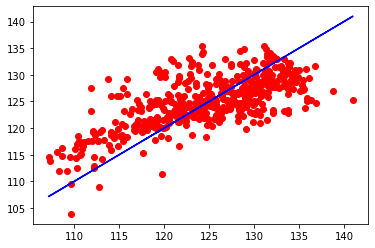

In [7]:
plt.scatter(y_test,y_predict,c="r")
plt.plot(y_test,y_test,c="b")

In [8]:
r2=r2_score(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
mse=np.sqrt(mean_squared_error(y_test,y_predict))
print(r2, mae, mse)

0.4786831843871032 3.797301823526464 4.868216833884345


In [9]:
from sklearn.linear_model import Ridge
model2=Ridge()
model2=model2.fit(x_train,y_train)
y_predict2=model2.predict(x_test)

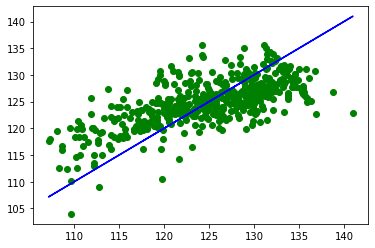

In [10]:
plt.scatter(y_test,y_predict2,c="g")
plt.plot(y_test,y_test,c="b")

In [11]:
r2=r2_score(y_test,y_predict2)
mae=mean_absolute_error(y_test,y_predict2)
mse=np.sqrt(mean_squared_error(y_test,y_predict2))
print(r2, mae, mse)

0.4608115854170187 3.9805716432325533 4.950958920852093


In [12]:
from sklearn.linear_model import Lasso
model3=Lasso()
model3=model3.fit(x_train,y_train)
y_predict3=model3.predict(x_test)

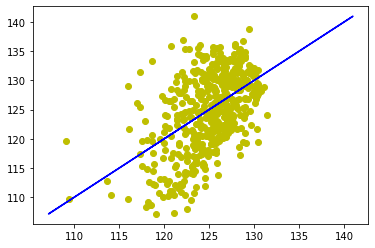

In [13]:
plt.scatter(y_predict3,y_test, c="y")
plt.plot(y_test,y_test,c="b")

In [14]:
r2=r2_score(y_test,y_predict3)
mae=mean_absolute_error(y_test,y_predict3)
mse=np.sqrt(mean_squared_error(y_test,y_predict3))
print(r2, mae, mse)

0.2548724161645788 4.812064689189575 5.820152541428355


In [16]:
from sklearn.linear_model import ElasticNet
model4= ElasticNet()
model4=model4.fit(x_train,y_train)
y_predict4=model4.predict(x_test)

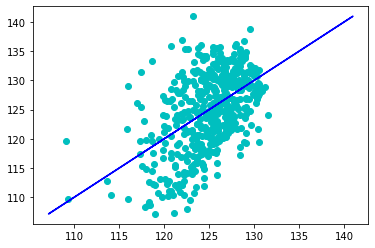

In [23]:
plt.scatter(y_predict4,y_test,c="c")
plt.plot(y_test,y_test,c="b")

In [24]:
r2=r2_score(y_test,y_predict4)
mae=mean_absolute_error(y_test,y_predict4)
mse=np.sqrt(mean_squared_error(y_test,y_predict4))
print(r2, mae, mse)

0.2546965153325792 4.818233907916723 5.820839476984029


In [26]:
from sklearn.preprocessing import PolynomialFeatures
pf= PolynomialFeatures(degree=2)
x_train_poly= pf.fit_transform(x_train)
x_test_poly=pf.fit_transform(x_test)
model5=LinearRegression()
model5= model5.fit(x_train_poly,y_train)

In [27]:
y_predict5=model5.predict(x_test_poly)
r2=r2_score(y_test,y_predict5)
mae=mean_absolute_error(y_test,y_predict5)
mse=np.sqrt(mean_squared_error(y_test,y_predict5))
print(r2, mae, mse)

0.5828979946211983 3.291884224811625 4.35451895985168


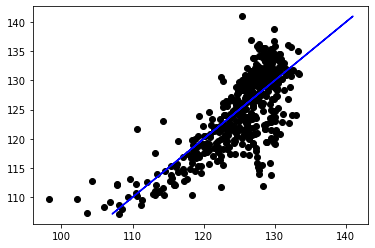

In [33]:
plt.scatter(y_predict5,y_test, c="k")
plt.plot(y_test,y_test,c="b")

In [34]:
from sklearn.preprocessing import PolynomialFeatures
pf3= PolynomialFeatures(degree=3)
x_train_poly3= pf3.fit_transform(x_train)
x_test_poly3=pf3.fit_transform(x_test)
model6=LinearRegression()
model6= model6.fit(x_train_poly3,y_train)

In [35]:
y_predict6=model6.predict(x_test_poly3)
r2=r2_score(y_test,y_predict6)
mae=mean_absolute_error(y_test,y_predict6)
mse=np.sqrt(mean_squared_error(y_test,y_predict6))
print(r2, mae, mse)

0.6488989198624495 2.995490844388981 3.9951687653853076


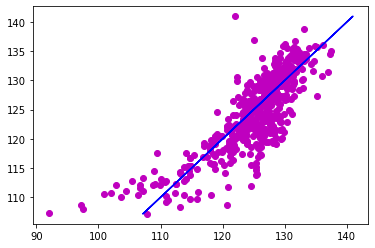

In [36]:
plt.scatter(y_predict6,y_test, c="m")
plt.plot(y_test,y_test,c="b")

In [39]:
from sklearn.preprocessing import PolynomialFeatures
pf4= PolynomialFeatures(degree=4)
x_train_poly4= pf4.fit_transform(x_train)
x_test_poly4=pf4.fit_transform(x_test)
model7=LinearRegression()
model7= model7.fit(x_train_poly4,y_train)
y_predict7=model7.predict(x_test_poly4)
r2=r2_score(y_test,y_predict7)
mae=mean_absolute_error(y_test,y_predict7)
mse=np.sqrt(mean_squared_error(y_test,y_predict7))
print(r2, mae, mse)

-13.665452992156663 12.595511607034883 25.820627237171745


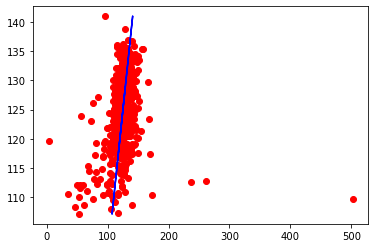

In [38]:
plt.scatter(y_predict7,y_test, c="r")
plt.plot(y_test,y_test,c="b")

In [41]:
from sklearn.tree import DecisionTreeRegressor
model8=DecisionTreeRegressor(random_state=1)
model8=model8.fit(x_train,y_train)
y_predict8=model8.predict(x_test)
r2=r2_score(y_test,y_predict8)
mae=mean_absolute_error(y_test,y_predict8)
mse=np.sqrt(mean_squared_error(y_test,y_predict8))
print(r2, mae, mse)

0.8486146627149445 1.9347943548387094 2.6233784899653543


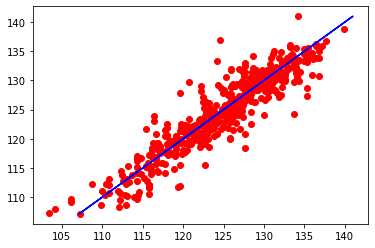

In [42]:
plt.scatter(y_predict8,y_test, c="r")
plt.plot(y_test,y_test,c="b")

In [43]:
from sklearn.ensemble import RandomForestRegressor
model9= RandomForestRegressor(max_depth=2,random_state=2,n_estimators=100)
model9=model9.fit(x_train,y_train)
y_predict9=model9.predict(x_test)

In [44]:
r2=r2_score(y_test,y_predict9)
mae=mean_absolute_error(y_test,y_predict9)
mse=np.sqrt(mean_squared_error(y_test,y_predict9))
print(r2, mae, mse)

0.4287343086068214 4.138494543668923 5.096102071762588


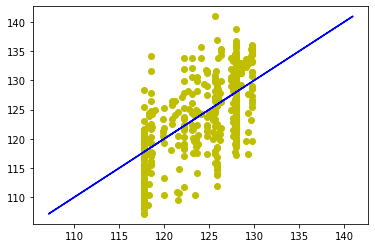

In [45]:
plt.scatter(y_predict9,y_test, c="y")
plt.plot(y_test,y_test,c="b")

# Hence Decision Tree Regressor predicted with the best accuracy of 84.8%